In [1]:
# This code is heavily derived from https://slundberg.github.io/shap/notebooks/Iris%20classification%20with%20scikit-learn.html
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
import shap
import time

X_train, X_test, y_train, y_test = train_test_split(*shap.datasets.iris(), test_size=0.2, random_state=42)

# rather than use the whole training set to estimate expected values, we could summarize with
# a set of weighted kmeans, each weighted by the number of points they represent. But this dataset
# is so small we don't worry about it
# X_train_summary = shap.kmeans(X_train, 50)

shap.initjs()

In [2]:
# clf = sklearn.neighbors.KNeighborsClassifier()
# clf = sklearn.tree.DecisionTreeClassifier()
clf = sklearn.ensemble.RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train, y_train)
# print_accuracy(clf.predict)
print('Accuracy = %.4f' % sklearn.metrics.accuracy_score(y_test, clf.predict(X_test)))

i = 13
c = 0  # ['setosa', 'versicolor', 'virginica']
# explainer = shap.KernelExplainer(clf.predict_proba, X_train)
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test.iloc[i])
# plot the SHAP values for the ['setosa', 'versicolor', 'virginica'] output of the i-th instance
shap.force_plot(explainer.expected_value[c], shap_values[c], X_test.iloc[i])

Accuracy = 1.0000


In [3]:
c = 1
shap.force_plot(explainer.expected_value[c], shap_values[c], X_test.iloc[i])

In [4]:
c = 2
shap.force_plot(explainer.expected_value[c], shap_values[c], X_test.iloc[i])

In [5]:
shap_values = explainer.shap_values(X_test)
# plot the SHAP values for the ['setosa', 'versicolor', 'virginica'] output of all instances
shap.force_plot(explainer.expected_value[c], shap_values[c], X_test)

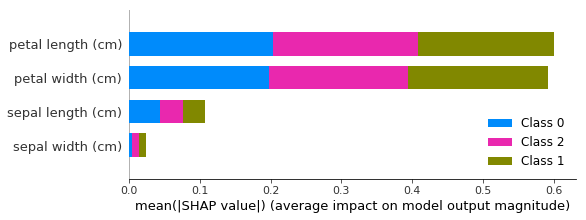

In [6]:
shap.summary_plot(shap_values, X_test)

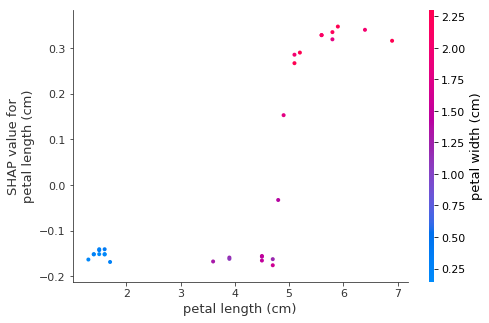

In [7]:
shap.dependence_plot('petal length (cm)', shap_values[c], X_test, interaction_index='petal width (cm)')

In [8]:
from lime.lime_tabular import LimeTabularExplainer
lime_explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns)
exp = lime_explainer.explain_instance(X_test.iloc[i], clf.predict_proba, num_features=len(X_test.columns))
exp.show_in_notebook()